# Exploring behavior of a membrane-protein system in  MD simulations:

     1.  membrane/protein/water atom density distribution along z axis 
     (perpendicular to the membrane surface that considered as being placed in the x/y plane)
     2.  area per lipid residue
     
     
##  Application example 
    Membrane containing cholesterol 50%  + POPC + POPE and M2 muscarinic receptor (PDB ID=4MQT)
     

### Input data required:
    trajectory file 
    pdb file (for example, generated from the first frame)
    
    
### Packages required:
    numpy
    matplotlib
    MDAnalysis
    scipy
    code is written on Python 3.x
   
   
#### Author: Daria Kokh
    v.1.0
    Copyright (c) 2019
    Released under the EUPL Licence, v1.2 or any higher version
    

    

##  1.  Reading a trajectory and making analysis
### input parameters
        - ref: reference pdb file (for example, the first frame)
        - sel_ligands: ligand residue name
        - interval: frames of the trajectory to be processed (first, last, stirde)
        - dh: grid interval (default- 43A )
        - d: grid interval over x and y (default- 4A )
        - sel_m_a: selection mask for membraine residues (default- "(not type H ) and ( resname CHL PC PA PE OL )")
        - sel_m: selection mask for lipids that will be used to compute area per lipid (default- "(not type H ) and ( resname CHL PC PA PE )". Since lipids are counted by  residue names, one should include only one residue name for each lipid type, otherwise some lipids will be counterd several times
        - align_mem: whether system must be aligned relative to the membrane or protein (default - False, i.e. relative to the protein)
        - sel_align: selection mask  to define membrane surface (defaults- "") 
        - shift_z: shift whole system over z (default - 0)



Reference structure
vector of the first plane: [[-0.01645959 -0.0254467   1.79735653]]
vector of the second plane: [[ 0.00312223 -0.01912536  0.69887473]]


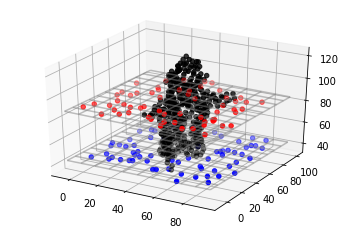

First frame after alignment
vector of the first plane: [[-0.00659553 -0.01245424  0.84701665]]
vector of the second plane: [[-0.0344955   0.00597319  1.44907552]]


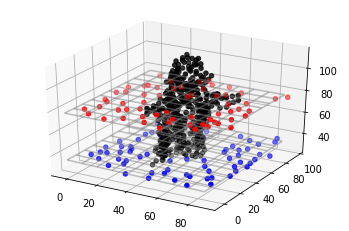

DIM (from traj, in Angstrom):  [ 90.26654  94.65103 137.8038   90.       90.       90.     ]
DIM (x/y/z, number of grid points):  24 25 48
number of frames= 1418; file size 1934 M
will be analyzed  6 frames
frames analyzed:  0  current frame:  200


In [4]:
from Scripts.Membrane_analysis import *

Christina = False
# define reference PDB file and trajectory file
if Christina:
    ref = "Data/Christina/step7.10_production.gro"
    traj = "Data/Christina/step7.1-10_production_skip10_mol.xtc"
else:    
    ref =  "Data/4MQT/AMBER_eq/ORTO-CHL-prod8-NPT.pdb"
    traj = "Data/4MQT/NAMD_eq/Replica1/ORT-CHL_repl.dcd"

if Christina:
    # selection of all membrane residues
    all_membrane = "(not protein) and  (not resname SOD CLA TIP3) "
    # selection of residues to compute area per lipid :
    # one can select either all lipids:
    residue_membrane = all_membrane + " and (not resname CER18, BGLC, BGAL, ANE5A) "
    # or just one lipid:
    residue_membrane = "resname CHL*"

    Mem = Membrane_properties(ref, d = 4,dh = 4, interval=(1,10,1),sel_m = residue_membrane, \
        sel_m_a = all_membrane, align_mem = True, sel_align= "(resname DPPC POPC and name P*)",shift_z=30)
else:
    residue_membrane ="resname CHL*"
    Mem = Membrane_properties(ref,sel_ligands = " IXO ",d=4,interval=(200,-1,200),sel_m = residue_membrane , \
                              sel_m_a = "resname CHL PC PA PE OL", align_mem = False, sel_align= "(resname PC PE and name P31)")
    
#-- generate data for each frame 
Mem.Get_info(traj)
#-- average data averaged over frames
Mem.Prep4plot()


##  2.  Examples of result vizualization (averaged over all frames) 
###        visualization (A)
    Several plots are computes:
    1. The surface density 
            of protein and membrane in the xy plane as a function of z 
            Membrane atoms to be counted are defined by the input parameter sel_m_a (all non-H atoms considered)
            It is assumed that each atom occupies one cell in the x/y plane (the cell dimention is defined by the input parameter d)   
            The density is computed as an average value over all frames . 
            The slab thickness (i.e. step over z) is defined by the input parameter dh. 
    2. Area per lipid 
            as a fanction of z is computed for membrane residues defined by the input parameter sel_m 
            Number of residues in each slab z is counted
            Residues to be counted are defined by the input parameter sel_m (all non-H atoms considered)
    3. Area occupied by different parts of the system
            as a fanction of z (averaged over each z - slab i.e. also in xy plane)   
            Membrane atoms to be counted are defined by the input parameter sel_m_a (all non-H atoms considered)
    4. Protein radius of gyration as a function of the frame    


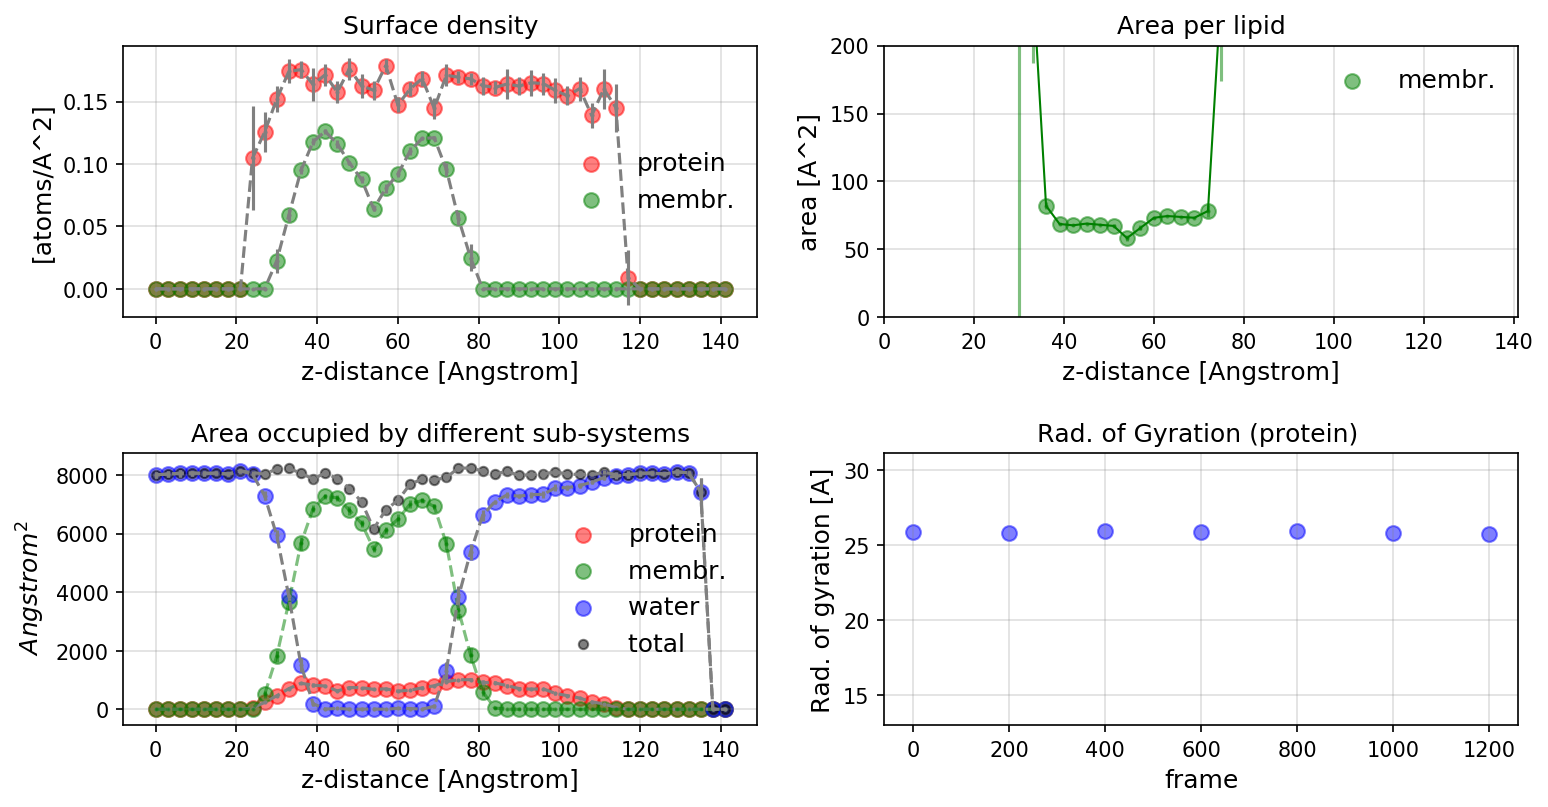

In [5]:
import warnings
warnings.filterwarnings("ignore") 
# plot the variation of membrane parameters over z
Mem.Plot_mem_prot_wat_dens()
# save current array containing area_per_lipid
if residue_membrane == "resname CHL*":
    area_per_lipid_CHL = Mem.m_r_per_area
else:
    area_per_lipid_all = Mem.m_r_per_area


### Visualization (B) 
    1. Atom distribution over the surface for protein atoms 
    2. Atom distribution over the surface for all membrane atoms -  defined by sel_m_a  mask
    3. Atom distribution over the surface for selected lipid atoms -  defined by sel_m  mask

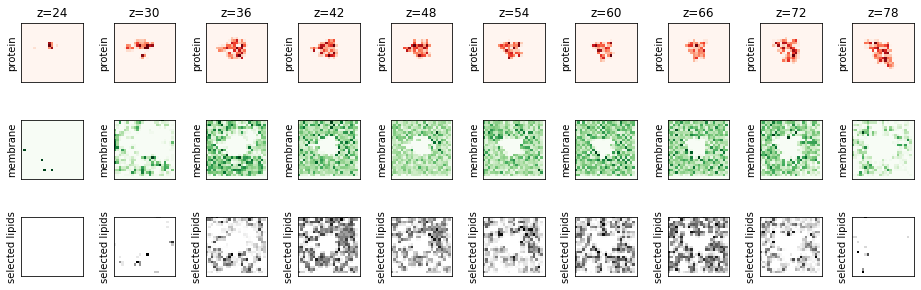

In [6]:
# plot membrane and protein destribution for several z values averaged over all frames
Mem.Plot_mem_z()


##  3.  Examples of result vizualization per frame using variables of the class Membrane_properties

        
###  3.1 Per-frame data:

##### arrays of numpy 3D matrices: [frame][z, x, y] 
        Mem.mem_slab  -  atom dencity for the membrane 
        Mem.prot_slab  -  atom dencity for the protein
        Mem.wat_slab  -  atom dencity water
        
##### arrays of vectors: [frame][z] 
        Mem.prot_area - area of the protein in the xy plane
        Mem.mem_area - area of the membrane in the xy plane
        Mem.wat_area - area of water molecules in the xy plane
        Mem.resid_array - 
        Mem.dens_p  - density of lipid atoms  in the x/y plane
        Mem.dens_w  - density of water  atoms  in the x/y plane
        Mem.dens_m   - density of lipid atoms  in the x/y plane
        Mem.m_r_per_area - area per lipid in the x/y plane
        
##### arrays of arrays: [frame][z][x]  
        Mem.resid_array_zx - area per lipid as a function of z and x
        
##### vector [frame]
        Mem.Rgr - protein radius of gyration 

####  3.1.1  Distribution of the lipid atoms in the xy plane at fixed z and from several frames

Z= 29


IndexError: list index out of range

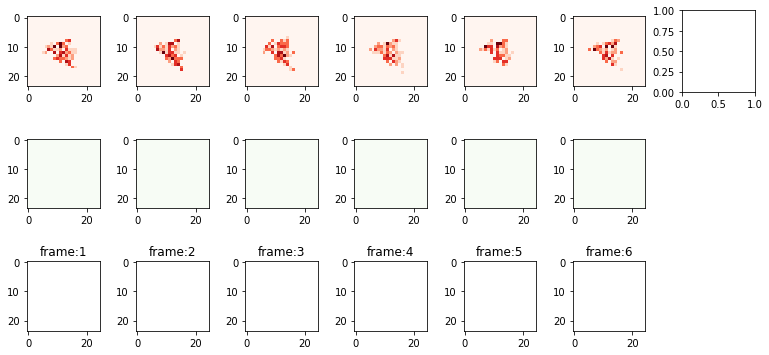

In [8]:
def plot_frame_z(frames, z):
    print("Z=",z)
    plots = int((frames[1]-frames[0] + 1)/frames[2])
    fig = plt.figure(figsize=(15, 6))
    gs = gridspec.GridSpec(3, plots,hspace=0.5,wspace = 0.5) 
    for i,f in enumerate(range(frames[0],frames[1],frames[2])):
        ax1 = plt.subplot(gs[i])    
        ax1.imshow(Mem.prot_slab[f][z],cmap="Reds")
        ax2 = plt.subplot(gs[i+plots])    
        ax2.imshow(Mem.mem_slab[f][z],cmap="Greens")
        ax3 = plt.subplot(gs[i+2*plots])    
        ax3.imshow(Mem.mem_resid_slab[f][z],cmap="Greys")
        plt.title ("frame:"+str(f))
    plt.show()
    return

frames = (1,8,1)   # frames: (first, last, step)
z = int(Mem.nz/2)+5 # z slab to be used for vizualization counting from the middle of the box
plot_frame_z(frames, z)

####  3.1.2  Area per lipid as a function of z  in several frames

In [ ]:

fig = plt.figure(figsize=(4, 2),dpi=150)
for frame in range(0,len(Mem.m_r_per_area),2):
    plt.scatter(x= Mem.dz*np.linspace(0,np.mean(Mem.m_r_per_area,axis=0).shape[0],np.mean(Mem.m_r_per_area,axis=0).shape[0]),y=Mem.m_r_per_area[frame], label="frame "+str(frame))
plt.title("membrane area in the x/y plane per lipid", fontsize=10)
plt.ylabel(' $Angstrom^2 $ ', fontsize=10)
plt.xlabel('z, Angstrom', fontsize=10)
plt.ylim(0,200)
plt.legend()
plt.show()